### Notebook imports and packages

In [1]:
#Cost Function-->Loss Function -->Error Function-->Objective Function

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Example 1 - A simple cost function
$f(x) = x^2 + x + 1$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)
#print(x_1)

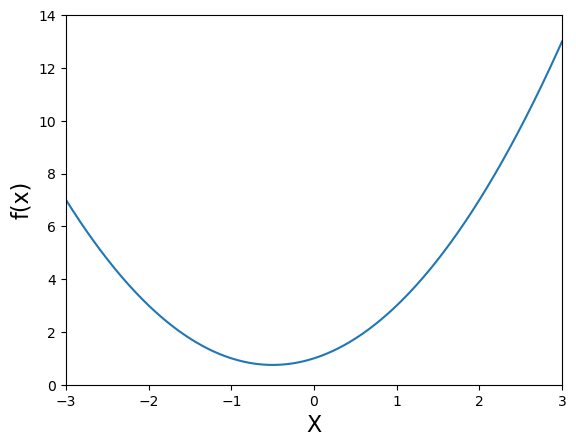

In [5]:
# plot
plt.plot(x_1,f(x_1))
plt.xlim(-3,3)
plt.ylim(0,14)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.show()

In [6]:
def df(x):
    return 2*x + 1

## Slope & Derivatives
create a python function for the derivative of $f(x)$ called $df(x)$

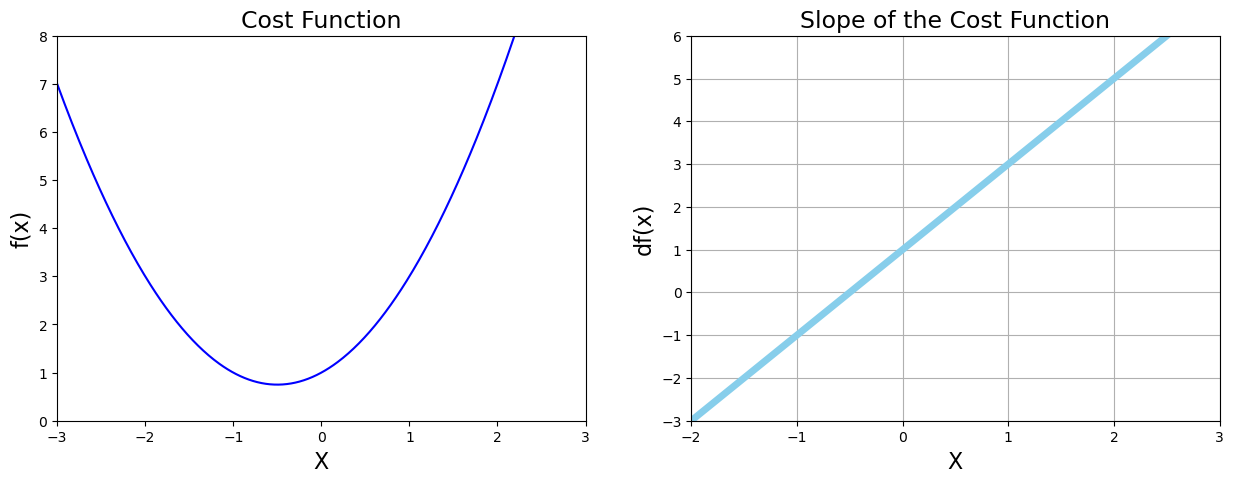

In [7]:
# plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1,f(x_1), color= 'blue')

# 2 chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [8]:
# def df(x):
#     return 2*x + 1

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    #print(new_x)
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


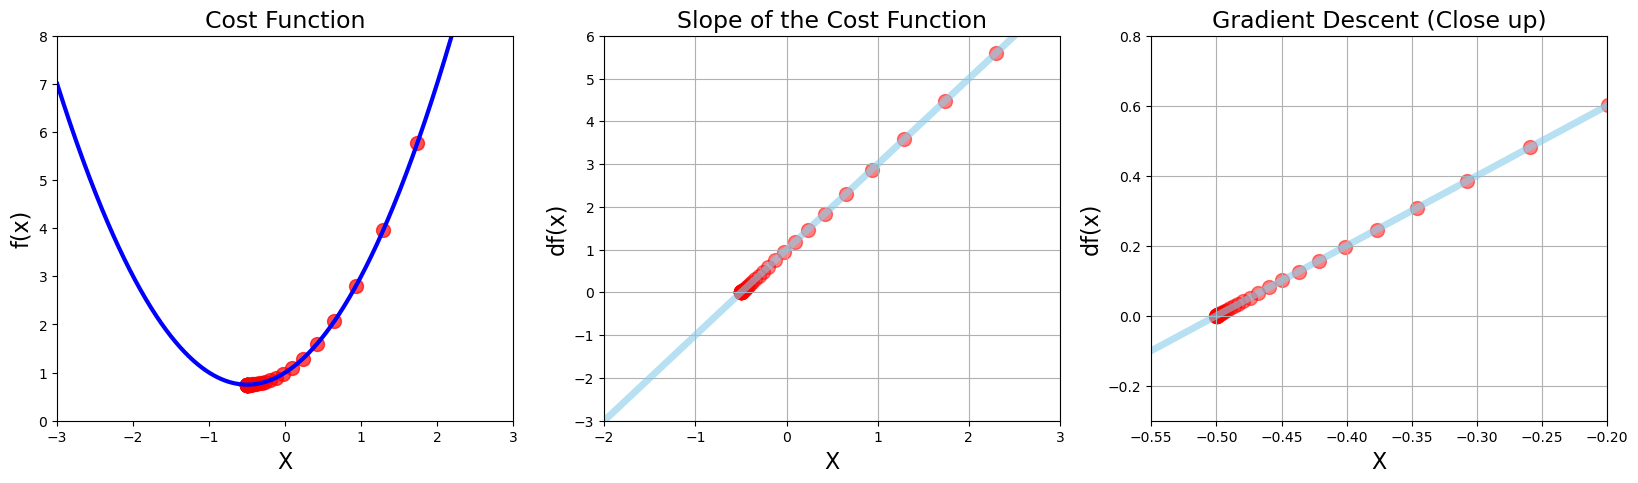

In [9]:
# Superimpose the gradient descent plot function and calculation on plot

plt.figure(figsize=[20,5])

#1 chart: cost function
plt.subplot(1,3,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1,f(x_1), color= 'blue', linewidth=3)

########################
values = np.array(x_list)
plt.scatter(x_list, f(values), color= 'red', s=100, alpha=0.7)
############################

# 2 chart: Derivative
plt.subplot(1,3,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

#######################
plt.scatter(x_list, slope_list, color= 'red', s=100, alpha=0.5)
#######################

# 3 chart: Derivative (Close up)
plt.subplot(1,3,3)

plt.title('Gradient Descent (Close up)', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

#######################
plt.scatter(x_list, slope_list, color= 'red', s=100, alpha=0.5)
#######################



plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Adanced Function
$$g(x)= x^4 -4x^2 +5$$

In [10]:
# Make some data
x_2 = np.linspace(-2, 2, 100)

# write the g(x) function and dg(x) function in python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

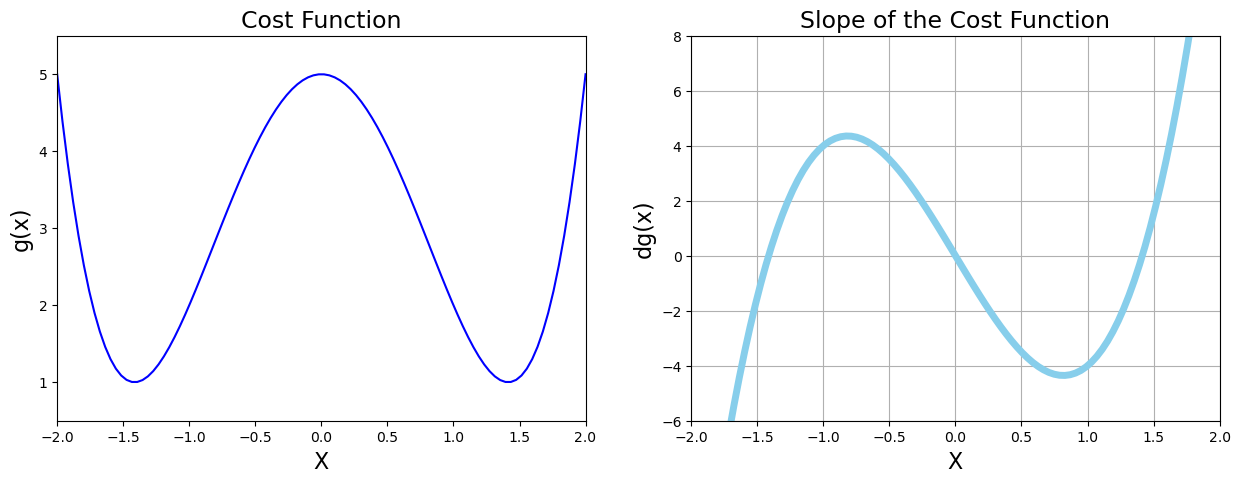

In [11]:
# plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color= 'blue')

# 2 chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a python function

In [12]:
def gradient_descent (derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


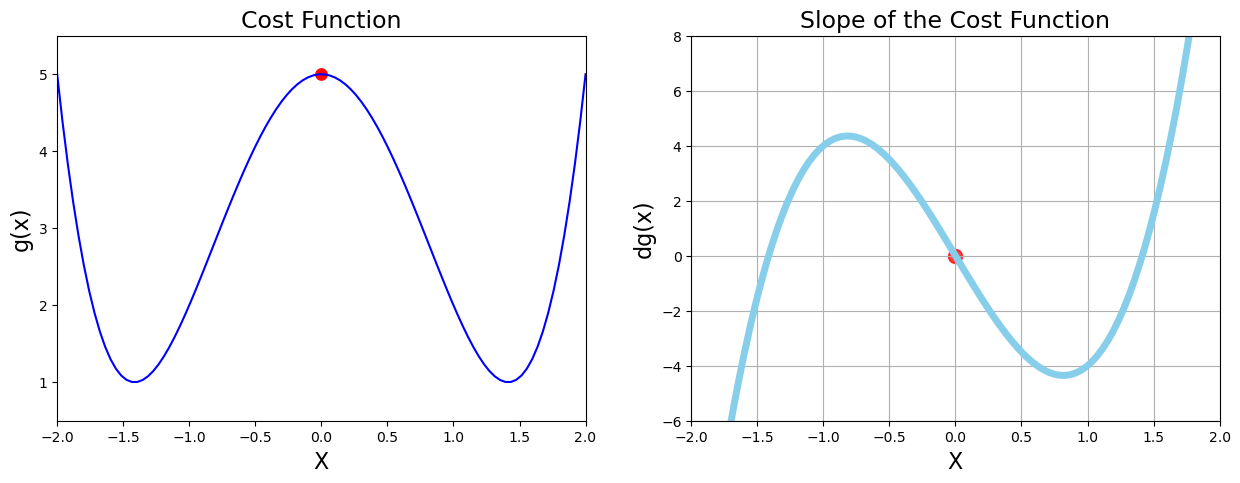

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# plot function and derivative side by side

plt.figure(figsize=[15,5])

#1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color= 'blue')
##################################
plt.scatter(list_x,g(np.array(list_x)), color= 'red', linewidth=3, alpha=0.8)
##################################

# 2 chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)
#############################
plt.scatter(list_x, deriv_list, color= 'red', s=100, alpha=0.5)
############################

plt.show()

# Example3 - Divergence, Overflow and python tupples
$$h(x) = x^5 - 2x^4 + 2$$

In [16]:
#make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

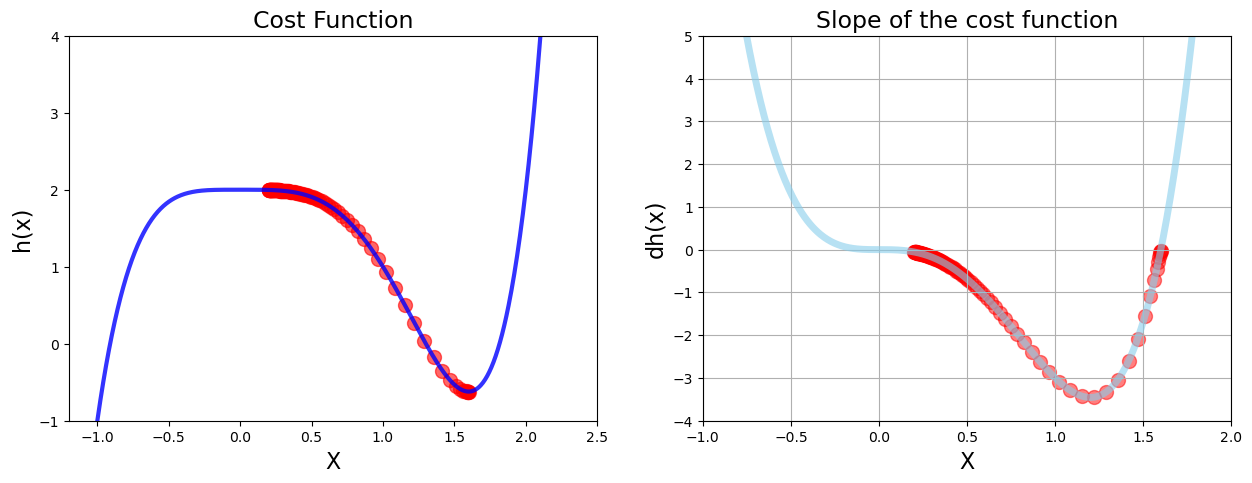

Local min occurs at:  1.5989534547394717
cost at this minimum is:  -0.6214287992331258
Number of steps:  117


In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=0.2)

#plot function and derivative and scatter plot side by side

plt.figure(figsize =[15,5])

#1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color= 'skyblue', linewidth = 5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

# Python tuples

In [18]:
# Creating a tuple
breakfeast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I looooove', breakfeast[0])
print('My hotel has no '+ str(unlucky_numbers[1])+ 'th floor')

main, side, greens = breakfeast
print('Main course is ', main)

I looooove bacon
My hotel has no 4th floor
Main course is  bacon


In [22]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is ', data_tuple[0])
print('Cost at the last x value is ', h(data_tuple[0]))
print('Number of steps is ', len(data_tuple[1]))


Local min is  1.5989534547394717
Cost at the last x value is  -0.6214287992331258
Number of steps is  117
